In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn import linear_model

from utils import plt_linefit
from datasets import generate_1d_dataset
from homomorphic_encryption import encryption_train, decryption_train, encryption_test, decryption_test, estimator_OLS, predict 

## Homomorphic Encryption

## Generate Data

In [2]:
# m number of data points
# n number of features
m = 200
n = 1

#np.random.seed(437) 

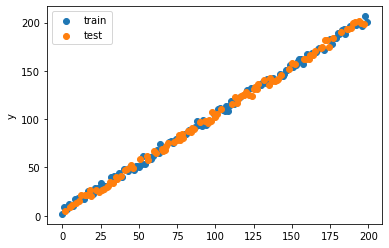

In [3]:
X_train, X_test, y_train, y_test = generate_1d_dataset(m, n, factor=10.0)
X_train = np.array([[1,xi.item()] for xi in X_train])
X_test = np.array([[1,xi.item()] for xi in X_test])
plt.scatter(X_train.T.tolist()[1], y_train.T.tolist()[0], label="train")
plt.scatter(X_test.T.tolist()[1], y_test.T.tolist()[0], label="test")
plt.ylabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Test the Encryption/Decryption Method

In [4]:
H_enc = encryption_train(X_train,y_train)

In [5]:
H_dec = decryption_train(H_enc[0],H_enc[1],H_enc[2],H_enc[3])

In [6]:
X_enc = H_enc[0]
y_enc = H_enc[1]

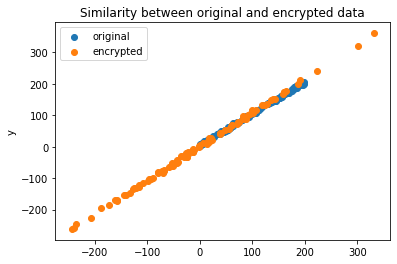

In [7]:
plt.scatter(X_train.T.tolist()[1], y_train.T.tolist()[0], label="original")
plt.scatter(X_enc.T.tolist()[1], y_enc.T.tolist()[0], label="encrypted")
plt.title("Similarity between original and encrypted data")
plt.ylabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Train Linear Regression

### Raw DATA

In [8]:
# Homemade estimator
β̂_raw = estimator_OLS(X_train,y_train)
β̂_raw

matrix([[5.15967967],
        [1.00108387]])

In [9]:
# sklearn estimator
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X_train, y_train)

#print(regr.intercept_[0])
regr.coef_[0]

array([5.15967967, 1.00108387])

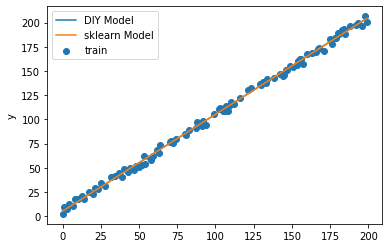

In [10]:
plt.scatter(X_train.T.tolist()[1], y_train.T.tolist()[0], label="train")
plt.plot([np.min(X_train[:,1]), np.max(X_train[:,1])], plt_linefit(X_train,β̂_raw), label="DIY Model")
plt.plot([np.min(X_train[:,1]), np.max(X_train[:,1])], plt_linefit(X_train,regr.coef_[0]), label="sklearn Model")
plt.ylabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Encrypted DATA

In [11]:
# Homemade estimator
β̂_enc = estimator_OLS(X_enc,y_enc)
β̂_enc

matrix([[ 5.23981932],
        [-0.41080004]])

In [12]:
# sklearn estimator
regr_enc = linear_model.LinearRegression(fit_intercept=False)
regr_enc.fit(X_enc, y_enc)

regr_enc.coef_[0]

array([ 5.23981932, -0.41080004])

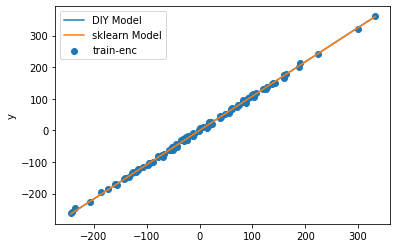

In [13]:
plt.scatter(X_enc.T.tolist()[1], y_enc.T.tolist()[0], label="train-enc")
plt.plot([np.min(X_enc[:,1]), np.max(X_enc[:,1])], plt_linefit(X_enc,β̂_enc), label="DIY Model")
plt.plot([np.min(X_enc[:,1]), np.max(X_enc[:,1])], plt_linefit(X_enc,regr_enc.coef_[0]), label="sklearn Model")
plt.ylabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Prediction

### Prediction on Raw DATA

In [14]:
y_test_raw = predict(β̂_raw,X_test)
print(f"R2: {r2_score(y_test, y_test_raw,multioutput='uniform_average')}")

R2: 0.9976538444224966


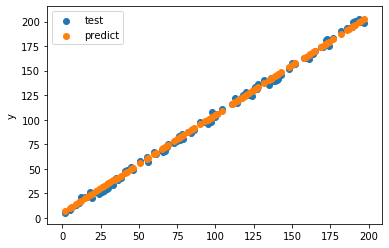

In [15]:
plt.scatter(X_test.T.tolist()[1], y_test.T.tolist()[0], label="test")
plt.scatter(X_test.T.tolist()[1], y_test_raw.T.tolist()[0], label="predict")
plt.ylabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Prediction on Encrypted DATA

In [16]:
H = encryption_test(X_test,H_enc[3])

y_pred_homo = predict(β̂_enc,H[0])

#print(f"R2: {r2_score(X_test, np.linalg.inv(H[1]).dot(H[0]),multioutput='uniform_average')}")
print(f"R2: {r2_score(y_test, y_pred_homo,multioutput='uniform_average')}")

R2: -14.06932490792416


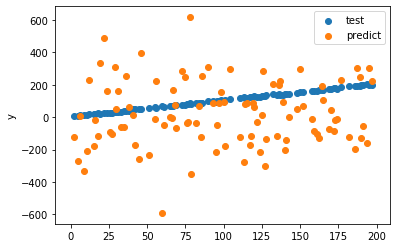

In [17]:
plt.scatter(X_test.T.tolist()[1], y_test.T.tolist()[0], label="test")
plt.scatter(X_test.T.tolist()[1], y_pred_homo.T.tolist()[0], label="predict")
plt.ylabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Decryption After Prediction

In [18]:
#y_pred_homo_dec = np.linalg.inv(H[1]).dot(y_pred_homo)
y_pred_homo_dec = decryption_test(y_pred_homo,H[1])
print(f"R2: {r2_score(y_test, y_pred_homo_dec,multioutput='uniform_average')}")

R2: -29.991502769068035


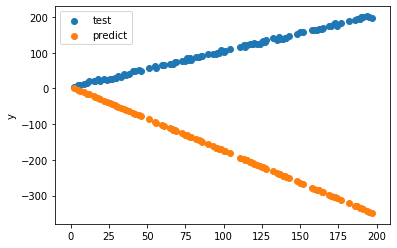

In [19]:
plt.scatter(X_test.T.tolist()[1], y_test.T.tolist()[0], label="test")
plt.scatter(X_test.T.tolist()[1], y_pred_homo_dec.T.tolist()[0], label="predict")
plt.ylabel("X") 
plt.ylabel("y")
plt.legend()
plt.show()